# Assignment 3
## Akarsh Sahu
## 10-16-2019

In [1]:
import pandas as pd
import numpy as np

# Part 1: Data Processing

a) Import the data: Only keep numeric data (pandas has tools to do this!). Drop "PHONE" and "COUNTRY_SSA" as well. Verify that your data has the following shape: (15617, 28)

In [2]:
directory = "C:\\Users\\akars\\OneDrive\\Desktop\\MSCA Program\\MScA Autumn\\Machine Learning\\Assignments\\Assignment 3\\"
data = pd.read_csv(directory + "ProviderInfo.csv")
data.head()

,PROVNUM,PROVNAME,ADDRESS,CITY,STATE,ZIP,PHONE,COUNTY_SSA,COUNTY_NAME,OWNERSHIP,...,CYCLE_2_REVISIT_SCORE,CYCLE_2_TOTAL_SCORE,WEIGHTED_ALL_CYCLES_SCORE,INCIDENT_CNT,CMPLNT_CNT,FINE_CNT,FINE_TOT,PAYDEN_CNT,TOT_PENLTY_CNT,FILEDATE
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653.0,2.563324e+09,290.0,Franklin,For profit - Individual,...,0,8,3.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01
1,15010,COOSA VALLEY NURSING FACILITY,315 WEST HICKORY STREET,SYLACAUGA,AL,35150.0,2.562496e+09,600.0,Talladega,For profit - Corporation,...,0,16,28,0.0,0.0,1.0,15259.0,1.0,2.0,2018-07-01
2,15012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768.0,2.562184e+09,350.0,Jackson,Government - County,...,0,12,31.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206.0,2.058330e+09,360.0,Jefferson,For profit - Corporation,...,0,24,33.6,0.0,1.0,0.0,0.0,0.0,0.0,2018-07-01
4,15015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY P O BOX 97,MC CALLA,AL,35111.0,2.054776e+09,360.0,Jefferson,For profit - Corporation,...,0,24,19.2,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-01


In [3]:
data.dtypes

PROVNUM                       object
PROVNAME                      object
ADDRESS                       object
CITY                          object
STATE                         object
ZIP                          float64
PHONE                        float64
COUNTY_SSA                   float64
COUNTY_NAME                   object
OWNERSHIP                     object
BEDCERT                      float64
RESTOT                       float64
CERTIFICATION                 object
INHOSP                        object
LBN                           object
PARTICIPATION_DATE            object
CCRC_FACIL                    object
SFF                           object
OLDSURVEY                     object
CHOW_LAST_12MOS               object
RESFAMCOUNCIL                 object
SPRINKLER_STATUS              object
OVERALL_RATING               float64
overall_rating_fn             object
SURVEY_RATING                float64
survey_rating_fn              object
QUALITY_RATING               float64
q

In [4]:
data1 = data.select_dtypes(include=['float64'])
data1 = data1.drop(['ZIP', 'PHONE'], axis = 1)
data1.shape

(15617, 28)

b) This data is extra messy and has some NaN and NaT values, which need to be removed completely. Hint: NaT values should be replaced by "np.nan." After this step, remove any rows that have an NaN value. Verify that your dataframe was properly updated to the following shape: (14557, 28)

In [5]:
# we don't need to explicitly remove NaT as we already removed datetime columns. Hence, just filter out NAs
data2 = data1.dropna()

In [6]:
data2.shape

(14557, 28)

In [7]:
X = data2.loc[:, data2.columns != 'OVERALL_RATING']
y = data2['OVERALL_RATING']


c) Split into train / test set using an 80/20 split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123 )


d) Scale X_train data properly (Do not scale the Target Variable): Recall from HW #2 the proper method of scaling.

In [9]:
#  Scale all predictors in train and test set.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

# Part 2: Logistic Regression Model

a) Pick up from step d in Problem 1 (use the same data that has been scaled): Using LogisticRegression(), build a model to predict the "OVERALL_RATING". Note: The default in sklearn is "one-vs-rest" classification, where we calculate the probability of each class compared to the rest. Please use this for your homework. 

In [10]:
## Logistic Model

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train_scale, y_train)

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

b) For error evaluation, start by calculating the score (returns the mean accuracy).You can use the .score() method. 

In [12]:
# Calculate Score - Mean Accuracy
logreg.score(X_train_scale, y_train)


0.7013310433662516

c) Calculate the confusion matrix and classification report for the test data (both are in sklearn.metrics). To do this, you will need to first predict the class of each observation in the test data. 

In [13]:
y_pred = logreg.predict(X_test_scale)

# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, y_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[271  76   0   0   0]
 [ 69 434  66   4   0]
 [  0 199  65 201   0]
 [  0 100   9 451 104]
 [  0   0   0  23 840]]



Classification Report

               precision    recall  f1-score   support

         1.0       0.80      0.78      0.79       347
         2.0       0.54      0.76      0.63       573
         3.0       0.46      0.14      0.21       465
         4.0       0.66      0.68      0.67       664
         5.0       0.89      0.97      0.93       863

   micro avg       0.71      0.71      0.71      2912
   macro avg       0.67      0.67      0.65      2912
weighted avg       0.69      0.71      0.68      2912



Text(0.5, 257.44, 'Predicted label')

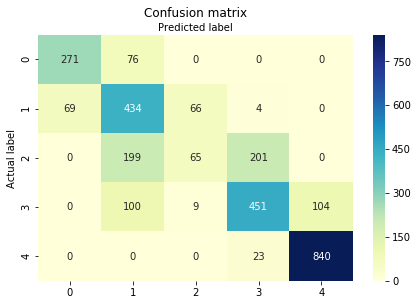

In [14]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1,2,3,4] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

d) Based on the confusion matrix and classification report, do any of the classes get predicted exceptionally poorly? If so, comment briefly on what might be causing this to happen

Class 3 got predicted exceptionally poorly. The F1 score is very low compared to the rest. Also, the value for recall is also extremely low. One reason might be that there are a lot of zeroes, so when the values were scaled the values that were originally zeroes all resulted in the same scaled number. Also because logistic regression is a binary classifier where the decision is made based on how far/close or higher/lower the result is from 0.5, the output suffers from symmetric bias.

e) Calculate predictions for the training data & build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?

In [15]:
y_tr_pred = logreg.predict(X_train_scale)

# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_tr_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, y_tr_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[1048  302    2    0    0]
 [ 233 1702  353   37    0]
 [   0  764  303  861    0]
 [   0  397   15 1815  427]
 [   0    0    0   87 3299]]



Classification Report

               precision    recall  f1-score   support

         1.0       0.82      0.78      0.80      1352
         2.0       0.54      0.73      0.62      2325
         3.0       0.45      0.16      0.23      1928
         4.0       0.65      0.68      0.67      2654
         5.0       0.89      0.97      0.93      3386

   micro avg       0.70      0.70      0.70     11645
   macro avg       0.67      0.66      0.65     11645
weighted avg       0.68      0.70      0.68     11645



There is no sign of overfitting. After comparing this to the classification report from the test dataset, there aren't significant differences in the accuracy for both models.

f) Print out an example of the predicted probability. There is a method called .predict_proba() which can be used for estimating these values on the test set. This will be critical to understand for future questions. 

In [16]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Prediction Probabilities for 1st observation in train set
print("Prediction Probability: ",logreg.predict_proba(X_test_scale)[3])

print("Predicted Rating: ",logreg.predict(X_test_scale)[3])

Prediction Probability:  [0.513 0.167 0.195 0.125 0.000]
Predicted Rating:  1.0


## Part 3: Model 2: PCA(n_components = 2) + Logistic Regression

a) Pick up from step d in Problem 1 (use the same data that has been scaled): We will now transform the X_train & X_test data using PCA with 2 components. Hint: the PCA class in sklearn can be used similarly to how we have used StandardScaler class (fit_transform on train and transform on test). 

-Transform X_train and call it X_train_pca_2
-Transform X_test and call it X_test_pca_2

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_scale)

print("Explained Variance Ratio by 2 components for X_train: ", pca.explained_variance_ratio_)
print("Total Explained Variance", pca.explained_variance_ratio_.sum())
X_train_pca_2 = pca.transform(X_train_scale)
X_test_pca_2 = pca.transform(X_test_scale)

Explained Variance Ratio by 2 components for X_train:  [0.231 0.150]
Total Explained Variance 0.3819004682377767


b) Then use the transformed data (X_train_pca_2) to fit a Logistic Regression model.

In [18]:
# Fit Logistic Model

logreg_pca_2 = LogisticRegression()
logreg_pca_2.fit(X_train_pca_2, y_train)

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
# Calculate Score - Mean Accuracy
logreg_pca_2.score(X_train_pca_2, y_train)

0.38050665521683125

c) Calculate the confusion matrix and classification report for the test data

In [20]:
y_pca2_pred = logreg_pca_2.predict(X_test_pca_2)

# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pca2_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, y_pca2_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[123 173   1  11  39]
 [ 95 266   0  27 185]
 [ 42 171   0  32 220]
 [ 18 165   0  30 451]
 [ 10 110   0  31 712]]



Classification Report

               precision    recall  f1-score   support

         1.0       0.43      0.35      0.39       347
         2.0       0.30      0.46      0.36       573
         3.0       0.00      0.00      0.00       465
         4.0       0.23      0.05      0.08       664
         5.0       0.44      0.83      0.58       863

   micro avg       0.39      0.39      0.39      2912
   macro avg       0.28      0.34      0.28      2912
weighted avg       0.29      0.39      0.31      2912



d) Calculate predictions for the training data & build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?

In [21]:
y_pca2_tr_pred = logreg_pca_2.predict(X_train_pca_2)

# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_pca2_tr_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, y_pca2_tr_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[ 538  645    2   52  115]
 [ 402  959    2  113  849]
 [ 162  757    1  114  894]
 [ 105  581    0  132 1836]
 [  36  423    1  125 2801]]



Classification Report

               precision    recall  f1-score   support

         1.0       0.43      0.40      0.41      1352
         2.0       0.28      0.41      0.34      2325
         3.0       0.17      0.00      0.00      1928
         4.0       0.25      0.05      0.08      2654
         5.0       0.43      0.83      0.57      3386

   micro avg       0.38      0.38      0.38     11645
   macro avg       0.31      0.34      0.28     11645
weighted avg       0.32      0.38      0.30     11645



There is no sign of overfitting. After comparing this to the classification report from the test dataset, there aren't significant differences in the accuracy for both models. Since we chose n=2 for this exercise (and I later found out below that 2 components cannot explain a lot of the total variance) the model did not show any sign of overfitting.

e) How well does this model perform relative to Model #1? Explain why there is a shift in performance. 

Model #1 performed better. The values from the classification report (espcially the f1 score) is higher for for model #1. This is primarily because there were some loss of information when I applied dimentionality reduction technique to the dataset (in this case I chose n=2).

## Part 4: Model 3: PCA(n_components = 16) + Logistic Regression

a) Pick up from step d in Problem 1 (use the same data that has been scaled): We will now transform the X_train & X_test data using PCA with 16 components. 

Transform X_train and call it X_train_pca_16
Transform X_test and call it X_test_pca_16

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca.fit(X_train_scale)

print("Explained Variance Ratio by 2 components for X_train: ", pca.explained_variance_ratio_)
print("Total Explained Variance", pca.explained_variance_ratio_.sum())
X_train_pca_16 = pca.transform(X_train_scale)
X_test_pca_16 = pca.transform(X_test_scale)

Explained Variance Ratio by 2 components for X_train:  [0.231 0.150 0.120 0.098 0.070 0.046 0.039 0.036 0.034 0.030 0.027 0.026
 0.023 0.022 0.019 0.016]
Total Explained Variance 0.9865046809265148


b) Then use the transformed data (X_train_pca_16) to fit a Logistic Regression model.

In [23]:
# Fit Logistic Model

logreg_pca_16 = LogisticRegression()
logreg_pca_16.fit(X_train_pca_16, y_train)

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akars\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
# Calculate Score - Mean Accuracy
logreg_pca_16.score(X_train_pca_16, y_train)

0.6925719192786604

c) Calculate the confusion matrix and classification report for the test data

In [25]:
y_pca16_pred = logreg_pca_16.predict(X_test_pca_16)

# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pca16_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, y_pca16_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[264  83   0   0   0]
 [ 68 436  65   4   0]
 [  0 198  67 200   0]
 [  0  99   4 441 120]
 [  0   0   0  22 841]]



Classification Report

               precision    recall  f1-score   support

         1.0       0.80      0.76      0.78       347
         2.0       0.53      0.76      0.63       573
         3.0       0.49      0.14      0.22       465
         4.0       0.66      0.66      0.66       664
         5.0       0.88      0.97      0.92       863

   micro avg       0.70      0.70      0.70      2912
   macro avg       0.67      0.66      0.64      2912
weighted avg       0.69      0.70      0.68      2912



d) Calculate predictions for the training data & build the confusion matrix and classification report. Are there signs of overfitting? Why or why not?

In [26]:
y_pca16_tr_pred = logreg_pca_16.predict(X_train_pca_16)

# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_pca16_tr_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, y_pca16_tr_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[1045  307    0    0    0]
 [ 247 1702  336   40    0]
 [   0  779  267  882    0]
 [   0  417    5 1746  486]
 [   0    0    0   81 3305]]



Classification Report

               precision    recall  f1-score   support

         1.0       0.81      0.77      0.79      1352
         2.0       0.53      0.73      0.62      2325
         3.0       0.44      0.14      0.21      1928
         4.0       0.64      0.66      0.65      2654
         5.0       0.87      0.98      0.92      3386

   micro avg       0.69      0.69      0.69     11645
   macro avg       0.66      0.66      0.64     11645
weighted avg       0.67      0.69      0.66     11645



Yes, there is clear sign of overfititing. The model performed better on the training dataset. Meaning it didn't do a good job in generalizing.

## Part 5: Conceptual Questions 

a) In order to better understand what is happening in Model 2 & Model 3, rerun PCA without specifying a number of components. Plot out the cumulative explained variance ratio vs number of components for the original scaled data. Describe what the plot is showing as well as what the cumulative explained variance tells us about our data.

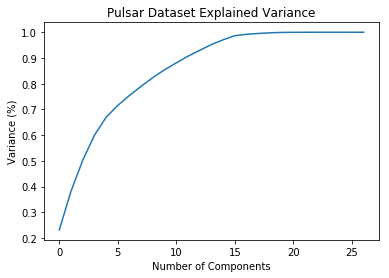

In [27]:
#Plotting the Cumulative Summation of the Explained Variance
from sklearn.decomposition import PCA
pca_test = PCA()

pca_test.fit(X_train_scale)
plt.figure()
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

As can be seen from the above explained variance vs no_of_components plot, we need ~16 components to explain 98% of the variance in the data. We are only able toe xplain about 35% of the variance by including just 2 components.

While performing dimension reduction using PCA, we choose the no. of components that at least explains 95% of the variance in the dataset. The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance. Hence, the plot above shows cumulative sum of explained variance ratios.

b) Between Model 2 and Model 3, which performed the best? Explain why this is.

Model 3 performed far better as compared to Model 2 for the following reasons:

1. The metrics Precison, Recall and f1-score measures the accuracy of the model prediction and all these metrics are significantly higher for Model 3 as compared to Model 2.

2. The score of the models calculates the difference between actual and predicted response as an accuracy measure. The score for Model 3: 69% is significantly higher as compared to the score of Model 2: 38% 

c) Assuming you are working with a company on a modeling project with a massive data set, what would be some of the benefits of utilizing PCA? 

When reducing the dimensions of data, it’s important not to lose more information than is necessary. The variation in a data set can be seen as representing the information that we would like to keep. Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible.

PCA achieves dimension reduction by creating new, artificial variables called principal components. Each principal component is a linear combination of the observed variables. PCA is in particular very useful while analyzing large datasets because:

1. Reduce No. of Features & Improve Model Performace - PCA will help us reduce the no. of predictors in our model and hence free up a lot of degree of freedoms while explaining high variance in the original data. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don't contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.

2. Removes Correlated Features - PCA removes the correlation between the features in your model. After implementing the PCA on your dataset, all the Principal Components are independent of one another. There is no correlation among them and this improves our model by removing multicollinearity 

3. Reduces Overfitting: Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. Improves Visualization: It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily. We can use 2D Scree Plot to see which Principal Components result in high variance and have more impact as compared to other Principal Components.

d) Now argue the opposite of question 3 - what is a negative result of utilizing this  dimensionality reduction technique? 

Here are some of the disadvantages of applying PCA:

1. Independent variables become less interpretable - After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

2. Information Loss - Although Principal Components try to cover maximum variance among the features in a dataset, if we don't select the number of Principal Components with care, it may miss some information as compared to the original list of features.

3. Data standardization is must before PCA - You must standardize your data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components. For instance, if a feature set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set. If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results. Also, for standardization, all the categorical features are required to be converted into numerical features before PCA can be applied.


e) sklearn offers a variety of methods to solve a multiclass logistic regression problem. One option is the "one-vs-the-rest" (also known as "one-vs-all" method). Explain in detail what this process does.

One-vs-all strategy works by fitting one classifier per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classifiers to produce a real-valued confidence score for its decision, rather than just a class label; discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency, one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. It is the most commonly used strategy for multiclass classification. This strategy can also be used for multilabel learning and it is also known as the binary relevance method.

f) Each of the three models utilized logistic regression. The Hands-On ML book describes the logistic function (sometimes called the sigmoid function) in detail. Using Equation 4-14, plot out the logistic function & describe why it is useful in classification problems of the nature covered in this homework assignment.

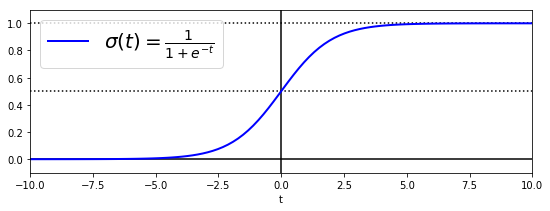

In [28]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

A Logistic Regression model computes a weighted sum of the input features, but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. The logistic is a sigmoid function that outputs a number between 0 and 1. The sigmoid function outputs the conditional probabilities of the prediction, the class probabilities, so it is useful in classification problems. But again, there are some disadvantages because the output can suffer from symmetric bias.